In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,OneHotEncoder 

# EDA

In [2]:
df = pd.read_csv('cancer patient data sets.csv')

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Algorithm 1: Random Forest Classifier

In [6]:
# split into X and y sets
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk']]
y = df['chronic Lung Disease']

# partition data, ensure reproducilibility
seed = random.seed()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify= y)

In [7]:
# fitting the model
dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

In [8]:
# hyperparameter tuning
param_dist = {'criterion': ['gini','entropy'],
              'max_depth': [5,10,20]}

dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)

# finding best parameter
rand_search = RandomizedSearchCV(dt, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

best = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'criterion': 'entropy'}


In [9]:
# displaying accuracy of best model
dt = DecisionTreeClassifier(max_depth = 10, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)
accuracy = round(dt.score(X_test, y_test),2)
print('The accuracy of this model is:', accuracy)

The accuracy of this model is: 0.98


In [10]:
# evaluating results using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.78      0.91      0.84        35
           3       0.46      0.86      0.60        28
           4       0.81      0.61      0.69        28
           5       0.83      0.31      0.45        16
           6       0.87      0.95      0.91        62
           7       1.00      0.57      0.73        21

    accuracy                           0.74       200
   macro avg       0.68      0.60      0.60       200
weighted avg       0.76      0.74      0.72       200



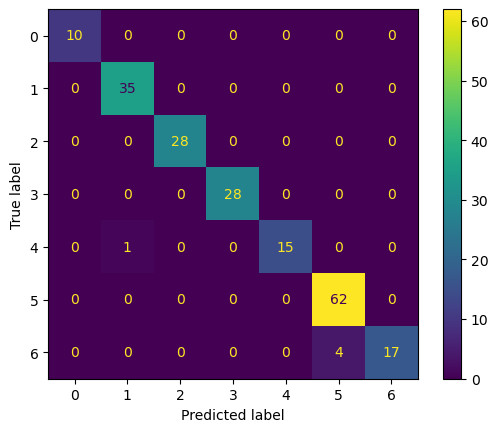

In [11]:
# evaluating results using confusion matrix
y_pred = best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Algorithm 2: K-Nearest Neighbors

In [12]:
df = pd.read_csv('cancer patient data sets.csv')

In [13]:
# partition data
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk']]
y = df['chronic Lung Disease']

random_seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=random_seed)

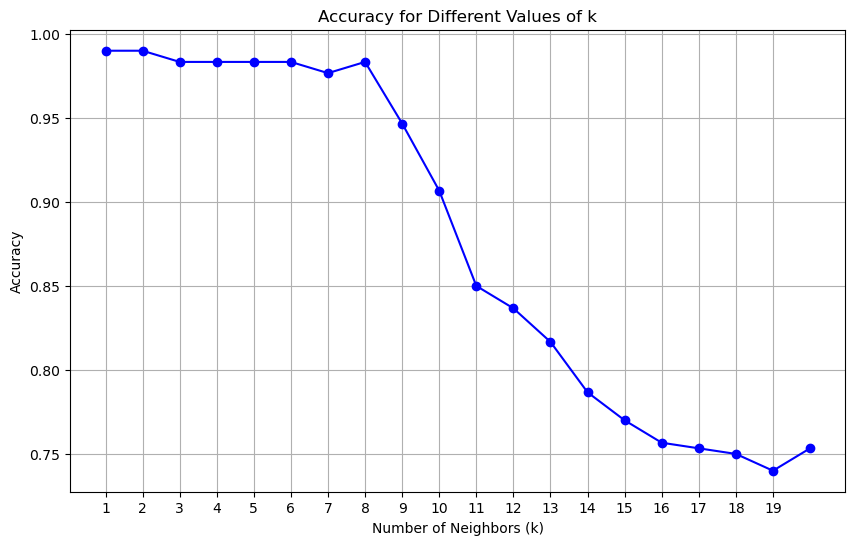

Best value of k: 1


In [14]:
k_values = list(range(1, 21))   
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20, 1))  
plt.grid(True)
plt.show()
best_k = k_values[np.argmax(accuracies)]
print(f"Best value of k: {best_k}")

In [15]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.99

# Algorithm 3: SVM

In [17]:
# partition data
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk']]
y = df['chronic Lung Disease']

random_seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=random_seed)

In [18]:
X_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk
822,42,1,2,1,2,3,4
188,48,2,1,6,7,8,7
251,28,2,1,6,7,5,3
71,62,1,6,8,7,7,7
664,25,2,4,5,6,5,5


In [19]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [20]:
y_pred = svm.predict(X_test)

print('The predicted BMI is: {}'.format(y_pred))

The predicted BMI is: [2 2 2 6 6 2 6 6 2 2 6 6 6 3 2 6 2 2 6 6 6 6 6 6 6 6 6 2 4 6 6 6 4 4 6 6 2
 6 2 4 2 2 2 2 2 2 2 6 4 2 3 6 6 2 2 6 6 6 2 2 2 6 2 2 2 2 2 4 6 2 6 6 2 6
 6 2 2 2 6 6 2 2 2 6 6 2 6 2 2 4 3 6 3 6 6 6 2 2 2 2 2 2 6 6 6 6 4 3 6 3 3
 3 4 2 6 2 6 2 4 2 6 3 6 4 3 6 6 4 2 6 6 6 6 2 2 4 2 6 6 2 4 6 4 6 6 2 4 2
 6 3 6 2 4 2 6 2 6 6 2 6 3 4 6 2 2 4 2 6 2 6 6 6 2 6 6 3 2 6 2 6 4 6 2 6 6
 2 3 2 2 6 6 4 2 3 2 6 4 6 6 6 3 4 2 2 6 4 6 6 2 6 6 3 4 6 2 6 4 4 6 6 6 2
 6 2 6 4 6 6 3 2 2 2 6 6 6 6 4 4 6 2 2 2 4 6 4 6 2 2 2 4 2 6 6 2 2 2 6 2 3
 6 6 4 6 3 6 6 4 2 4 3 6 6 4 2 6 3 3 6 2 6 3 2 6 6 3 6 2 2 6 2 4 2 2 6 4 6
 2 2 6 6]


In [21]:
#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.52


In [22]:
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

svm = SVC()

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5)
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_) #print the best parameters
print(svm_grid.best_score_)  #print the best score

{'C': 2, 'gamma': 1}
0.9628571428571429


In [23]:
target_names = ['1', '2', '3', '4', '5', '6', '7']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.36      0.75      0.48        51
           3       0.32      0.22      0.26        37
           4       0.36      0.32      0.34        44
           5       0.00      0.00      0.00        24
           6       0.74      0.93      0.82       103
           7       0.00      0.00      0.00        25

    accuracy                           0.52       300
   macro avg       0.25      0.32      0.27       300
weighted avg       0.41      0.52      0.45       300

